# Part I - Ford GoBike System Data
## by Saverio Tufano, Bedford Jan 22

## Table of contents

1) Introduction <br>
2) Preliminary Wrangling <br>
3) Domain understanding <br>
4) Data Wrangling <br>
5) Exploration

## Introduction
> The data set includes information about individual rides made in a bike-sharing system that covers the Greater S.F. Bay area.

> Below a brief overview of the dataset:

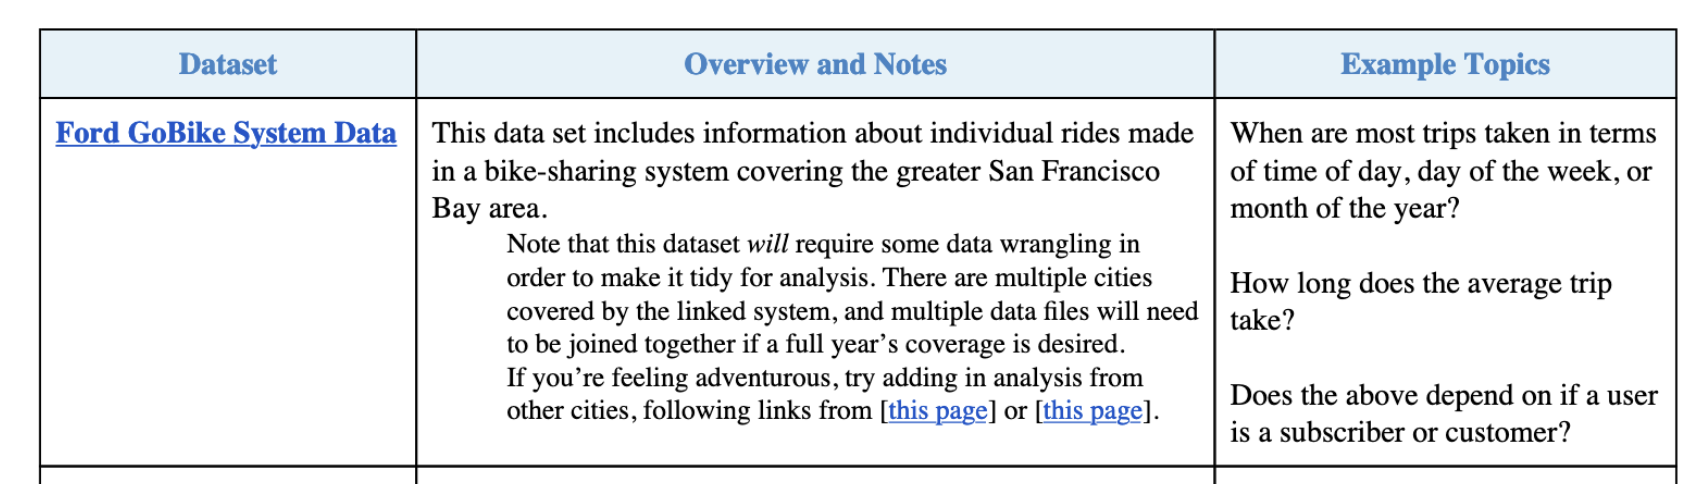

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# plot dataframe shape
df.shape

(183412, 16)

In [4]:
# gather info on the dataset such as indexes, data type, null entries
# check the amount of memory occupied by the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# view a sample of fine lines
df.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
117258,729,2019-02-11 23:12:39.3720,2019-02-11 23:24:48.9800,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,123.0,Folsom St at 19th St,37.760594,-122.414817,3067,Subscriber,1989.0,Male,No
56301,133,2019-02-21 09:13:54.0300,2019-02-21 09:16:07.6920,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,27.0,Beale St at Harrison St,37.788059,-122.391865,4398,Subscriber,1984.0,Male,No
143371,362,2019-02-07 15:41:50.8080,2019-02-07 15:47:53.4890,248.0,Telegraph Ave at Ashby Ave,37.855956,-122.259795,340.0,Harmon St at Adeline St,37.849735,-122.270582,4485,Subscriber,1977.0,Male,No
11978,515,2019-02-27 18:02:39.3790,2019-02-27 18:11:14.6560,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,22.0,Howard St at Beale St,37.789756,-122.394643,6564,Subscriber,1958.0,Male,No
14924,733,2019-02-27 10:28:57.6610,2019-02-27 10:41:11.1000,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,159.0,24th St at Market St,37.816060,-122.278244,4519,Subscriber,1990.0,Other,No


In [6]:
# generate descriptive statistics
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

> The dataset is made of 183412 lines, one for each bike ride during the month of Feb-2019.

There are 16 columns describing:
> - duration of the ride
> - start and end time of the ride
>- start in and ending station (with their own latitude and longitude)
>- bike ID
>- whether the ride was done by a member or by a subscriber
>- date of birth of the rider
>- bike share for all trip

**Note:** (https://www.quora.com/What-is-the-difference-between-a-customer-and-a-subscriber)<br>
A customer has purchased one product from you. They may never purchase another. A subscriber has purchased an ongoing commitment for a product with you. They will continue to pay you throughout or for the life of their subscription product.

### What is/are the main feature(s) of interest in your dataset?

>The main interest of my work will be to determine which features are linked to the number of rides

https://plotly.com/python/bubble-maps/

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect most variables will be correlated with the the number of rides. I certainly 
expect a correlation with the time of the day, the day of the month, the day of the week and the geographical location of the station.

## Domain Understanding

It is important to give a bit of context before diving into the data. 

I could find this webpage gives a little of background on the FordGo business

https://federicoraimondi.github.io/myProjects/Bike_Sharing_Analysis/

> ### 1 Domain Understanding
[...]
<br>
>Customers can go to a dock (bike station), take the bike after having unlocked it through the App, and then they can leave the bicycle in one of the stations that are based around the city. This service was launched in August 2013 with the name “Bay Area Bike Share” and in June 2017 it became Ford GoBike because of the partnership with Ford Motor Company. It currently has around 2500 bikes and 290 stations across San Francisco, San Jose and Bay’s East Coast
<br>
>The system is operated by Motivate, a New York-based company that provides the bike-share system and operates in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. <br>
>Expectations are that the entire system will reach 7000 bikes and 540 stations in the Bay Area.

## Data Wrangling
> Not knowning the content of the dataset, it is best to make some basic checks and clean it. These are the checks and corrections I will perform

> 1) Check for duplicates -> no action needed <br>
> 2) Convert time objects from string to "datetime" <br>
> 3) Check any null entries on station_id -> remove the observations without station ID <br>
> 4) Check station ID format -> convert from float to categorical <br>
> 5) check the member age column -> remove the suspicious observations <br>

In [7]:
# make a copy of the file and keep on working on df to take advantage of the short name
df_dirty = df.copy()

#### Check for duplicates

In [8]:
# check for duplicated rows
df[df.duplicated() == True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


#### Convert end and start_time from string to datetime object

In [9]:
# convert start and end time from string to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [10]:
df['start_time']

0        2019-02-28 17:32:10.145
1        2019-02-28 18:53:21.789
2        2019-02-28 12:13:13.218
3        2019-02-28 17:54:26.010
4        2019-02-28 23:54:18.549
                   ...          
183407   2019-02-01 00:04:49.724
183408   2019-02-01 00:05:34.744
183409   2019-02-01 00:06:05.549
183410   2019-02-01 00:05:34.360
183411   2019-02-01 00:00:20.636
Name: start_time, Length: 183412, dtype: datetime64[ns]

In [11]:
print(df['start_time'].min())
print(df['start_time'].max())

2019-02-01 00:00:20.636000
2019-02-28 23:59:18.548000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

#### Clean lines without station ID

In [13]:
#### consider lines without station ID
df[df['start_station_id'].isnull()].shape

(197, 16)

In [14]:
df[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.932,2019-02-28 21:24:23.738,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.273,2019-02-28 18:53:46.727,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.529,2019-02-28 17:13:09.431,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176154,1447,2019-02-02 12:03:04.544,2019-02-02 12:27:12.267,NaN,NaN,37.40,-121.93,NaN,NaN,37.40,-121.93,4249,Customer,1984.0,Male,No
179730,309,2019-02-01 12:59:45.969,2019-02-01 13:04:55.426,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4249,Customer,1987.0,Female,No
179970,659,2019-02-01 12:17:37.675,2019-02-01 12:28:37.014,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.94,4092,Subscriber,1999.0,Female,No
180106,2013,2019-02-01 11:33:55.147,2019-02-01 12:07:28.940,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.94,4251,Customer,1990.0,Female,No


There is a small subset of rides without start and end station ID. It seems the latitude/longitude data are not accurate (only to second decimal), that might be the cause for not being able to determine the station location. For the purposes of this study, I will just drop them.

In [15]:
# drop rows with na's in start or end station id
df = df.dropna(subset = ['start_station_id', 'end_station_id'])

In [16]:
# check if that has worked
df[df['start_station_id'].isnull()].shape

(0, 16)

#### Station id format is float (could be categorical) and contains NaN values

In [17]:
df['start_station_id'].unique()
df['start_station_id'].value_counts()

58.0     3904
67.0     3544
81.0     3052
21.0     2895
3.0      2760
         ... 
301.0       9
51.0        7
300.0       4
224.0       4
344.0       2
Name: start_station_id, Length: 329, dtype: int64

In [18]:
df.loc[:,'start_station_id'] = df['start_station_id'].astype('int').astype('category')

In [19]:
df['start_station_id'].sample(10)

2356      126
116939    116
34437     147
79539     345
6542      195
167850      3
80219     252
54556     246
68143      79
19746     162
Name: start_station_id, dtype: category
Categories (329, int64): [3, 4, 5, 6, ..., 386, 388, 389, 398]

In [20]:
df.loc[:,'end_station_id'] = df['end_station_id'].astype('int').astype('category')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183215 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183215 non-null  int64         
 1   start_time               183215 non-null  datetime64[ns]
 2   end_time                 183215 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  category      
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183215 non-null  float64       
 6   start_station_longitude  183215 non-null  float64       
 7   end_station_id           183215 non-null  category      
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183215 non-null  float64       
 10  end_station_longitude    183215 non-null  float64       
 11  bike_id                  183215 non-null  int64         
 12  user_type       

In [22]:
# convert user type to category
df.loc[:,'user_type'] = df['user_type'].astype('category')

#### Create a column for weekday (working day) and weekend

In [23]:
# Create a column for weekday or weekend
df['Weekday'] = np.where((df['start_time']).dt.dayofweek < 5,'weekday','weekend')

In [24]:
print(df[df['Weekday'] == 'weekday'].shape)
print(df[df['Weekday'] == 'weekend'].shape)

(152335, 17)
(30880, 17)


#### Let's now concentrate on cleaning the date of birth column

In [25]:
df['member_birth_year'].describe()

count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

(1940.0, 2007.15)

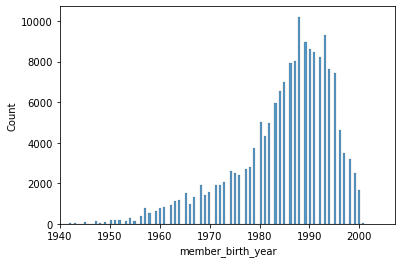

In [26]:
sb.histplot(df['member_birth_year']);
plt.xlim(1940)
# the distribution is skewed to the left

In [27]:
# check the ages with lowest counts
df['member_birth_year'].value_counts()[df['member_birth_year'].value_counts()<20]

1946.0    19
1939.0    11
1902.0    11
1941.0     9
1901.0     6
1920.0     3
1938.0     3
1944.0     2
1934.0     2
1928.0     1
1878.0     1
1930.0     1
1910.0     1
1927.0     1
Name: member_birth_year, dtype: int64

In [28]:
# check the rides for which there is no rider date of birth
df['member_birth_year'].isnull().value_counts()

False    174952
True       8263
Name: member_birth_year, dtype: int64

The following modifications will be needed:

1) remove the entries with implausible DOBs <br>
2) remove the entries with NaN in the DOB

It seems quite unlikely to have riders with date of birth before 1939, so I will remove all the entries starting from 1938 and before.

I might also remove all the rows with "nan" date of birth. 
Anyway, there is a risk I would like to clarify: it might be most of the customers do not input the DOB hence it is best to check the percentage of customers and subscribers not having input the DOB.

In [29]:
print(df[df['member_birth_year'].isnull()]['user_type'].value_counts())
print(df['user_type'].value_counts())

Subscriber    5028
Customer      3235
Name: user_type, dtype: int64
Subscriber    163414
Customer       19801
Name: user_type, dtype: int64


As expected, the number of entries without DOB is higher - in percentage - among the customers than the subscribers. It is risk to just remove the lines without DOB if we aim to make any comparative study between customers and subscribers.

In [30]:
df.to_csv('FordGo_clean.csv')

## Exploration

As a first step, we will investigate the distribution of rides as function of

1) start station <br>
2) end station <br>
3) latitude <br>
4) longitude <br>
5) date <br>
6) time of the day <br>

These variables, in pairs 1)+2), 3)+4), 5)+6) are suitable for bivariate analysis

>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Question 1
> 1) are the rides evenly distributed amongst the various stations?

In [31]:
df['start_station_name'].nunique()

329

In [32]:
# set a single color for the plotting, the avion blue
base_color = sb.color_palette()[0] 

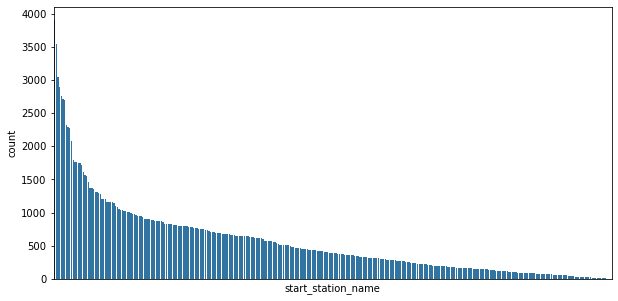

In [33]:
# create a frequency variable that will later allow to order the stations
#in decreasing order of number of rides
freq = df['start_station_name'].value_counts()
# Get the indexes of the Series
start_station_id = freq.index

# set figure dimension
plt.figure(figsize=[10, 5])

# Plot the bar chart in the decreasing order of the frequency of the `start_station_name`
g = sb.countplot(data=df, x='start_station_name', color=base_color, order=start_station_id[:]);
# to avoid overplotting, remove x-axis ticks and labels
g.set(xticks=[]); 
g.set(xticklabels=[]);

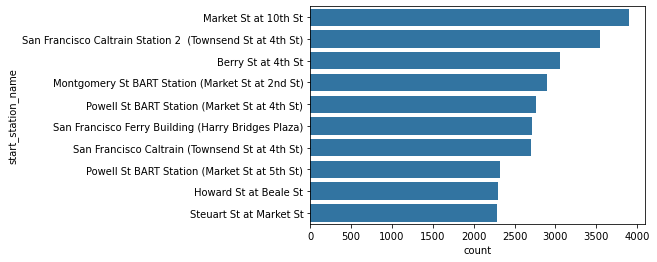

In [34]:
# Same plot but limited to 20 entries and oriented in y-direction
# this will allow reading the most common stations
sb.countplot(data=df, y='start_station_name', color=base_color, order=start_station_id[0:10]);

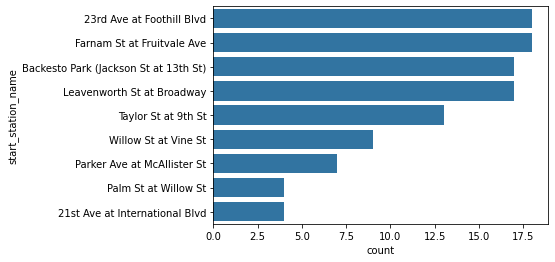

In [35]:
# Same plot but limited to 20 entries and oriented in y-direction
# this will allow reading the most common stations
sb.countplot(data=df, y='start_station_name', color=base_color, order=start_station_id[-10:-1]);

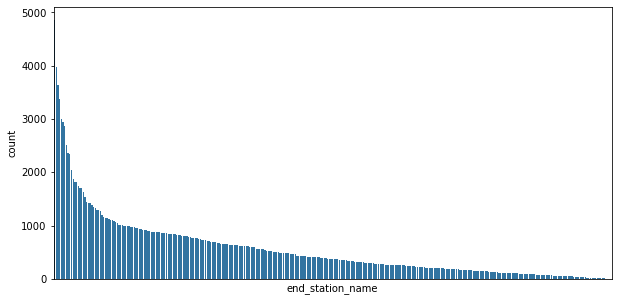

In [36]:
#same as above but for ending station

# create a frequency variable that will later allow to order the stations
#in decreasing order of number of rides
freq = df['end_station_name'].value_counts()
# Get the indexes of the Series
start_station_id = freq.index

# set figure dimension
plt.figure(figsize=[10, 5])

# Plot the bar chart in the decreasing order of the frequency of the `start_station_name`
g = sb.countplot(data=df, x='end_station_name', color=base_color, order=start_station_id[:]);
# to avoid overplotting, remove x-axis ticks and labels
g.set(xticks=[]); 
g.set(xticklabels=[]);

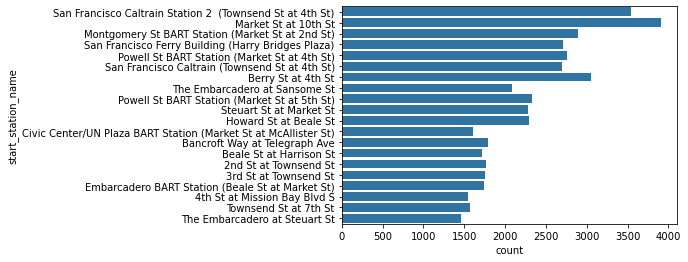

In [37]:
#same as above but for ending station

# Same plot but limited to 20 entries and oriented in y-direction
# this will allow reading the most common stations
sb.countplot(data=df, y='start_station_name', color=base_color, order=start_station_id[0:20]);

### Observation 1
> 1) The rides are not equally distributed, there are some stations with a large number of starting and ending rides. Market St at 10th St and S.F. Caltrain Station 2 are the most frequently used

### Question 2
> 2) Does the number of rides follow a particular patter related to the days of the month/week?

In [43]:
# define function for common chart settings
def chart(xlabel = "default label", ylabel = "default label", title = "title", xticks_rotation = 0):
    plt.xlabel(xlabel, fontsize = 15)
    plt.ylabel(ylabel, fontsize = 15)
    plt.title(title)
    plt.xticks(rotation=xticks_rotation);
base_color = sb.color_palette()[0] 

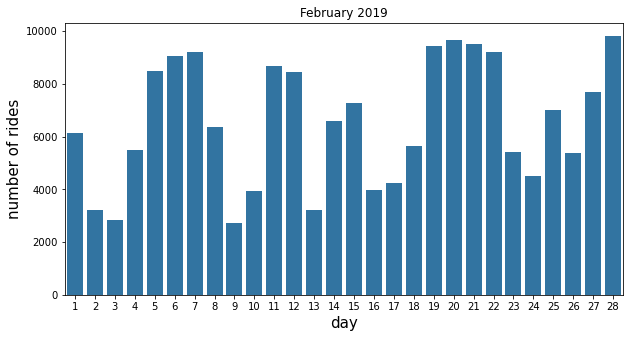

In [45]:
# set figure size
plt.figure(figsize=[10, 5])
# create countplot with by datetime day
g = sb.countplot(data=df, x=df['start_time'].dt.day,color=base_color);
# add axis notation and title
chart("day", "number of rides", "February 2019")

### Observation 2
> The number of rides follows a weekly pattern with lows during the weekend. The only outlier is the 13-Feb-2019 with an unusually low number of rides. It seems that, on that specific day, there was a storm:

> https://floodlist.com/america/usa/winter-storm-california-february-2019

> Let's also check how are the rides distributed, on average, during the week

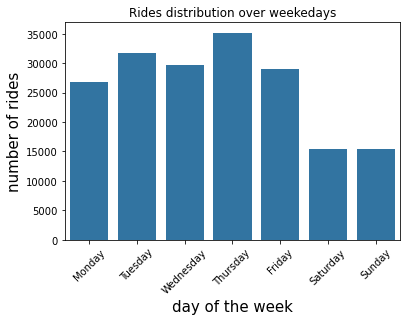

In [46]:
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g = sb.countplot(data=df, x=df['start_time'].dt.day_name(),color=base_color, order = day_order);

chart("day of the week", "number of rides", "Rides distribution over weekedays", 45)


### Observation 2.2
> The number of rides are generally higher during weekdays, suggesting the bike hiring system is used for work commuting

### Question 3
> Does the number of rides follow a particular patter depending on the time of the day?

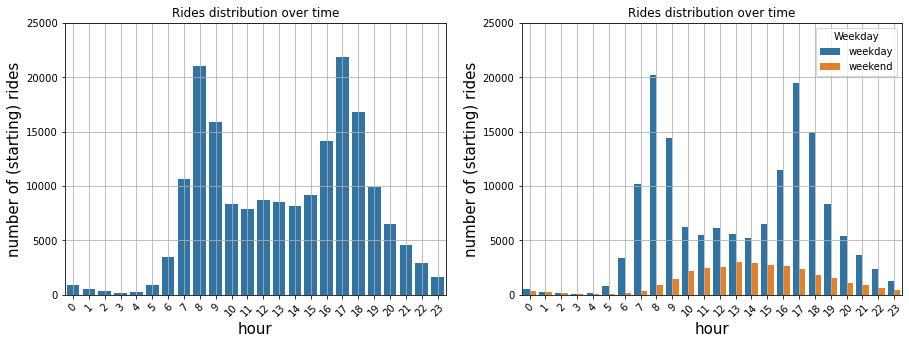

In [51]:
# use seaborn countplot and "datetime" library
plt.figure(figsize=[15, 5])
plt.subplot(1,2,1)
g = sb.countplot(data=df, x=df['start_time'].dt.hour,color=base_color);

chart("hour", "number of (starting) rides", "Rides distribution over time", 45)
g.set_ylim([0, 25000])
plt.grid()

plt.subplot(1,2,2)
g = sb.countplot(data=df, x=df['start_time'].dt.hour, hue = 'Weekday');
chart("hour", "number of (starting) rides", "Rides distribution over time", 45)
g.set_ylim([0, 25000])
plt.grid()

### Observation 3
> As expected, the number of rides varies on the time of the day. Highest concentration of rides is observed during regular peak time (8am and 5pm) and is, therefore, determined by the commuting patterns

### Question 4
> How are the rides distributed depending on the week day and time of the day?

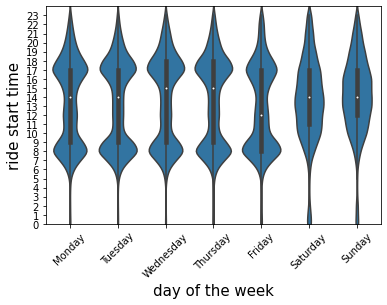

In [55]:
# define the "day order" so to be able to plot in order Monday to Sunday
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
# pick the base avio blue from the plotting color palette
base_color = sb.color_palette()[0]
# violin ploot of the distribution of rides vs time per each day of the week
sb.violinplot(data = df, x = df['start_time'].dt.day_name(), y = df['start_time'].dt.hour, color =  base_color, order = day_order)
# set plot options
chart("day of the week", "ride start time", None , 45)

plt.yticks(np.arange(0,24,1))
plt.ylim([0, 24])
plt.xticks(rotation=45);

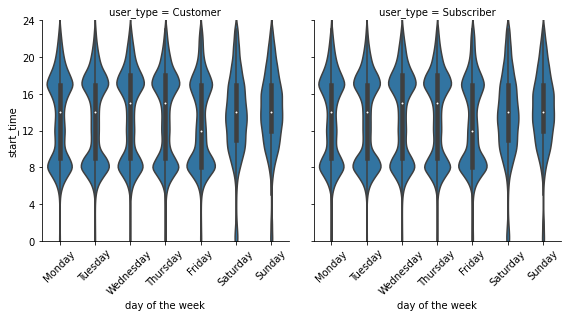

In [42]:
# same plot as above but faceted between Customer and Subscriber
g = sb.FacetGrid(data = df, col = 'user_type', height = 4)
g.map(sb.violinplot, x = df['start_time'].dt.day_name(), y = df['start_time'].dt.hour, color =  base_color, order = day_order)
g.figure.subplots_adjust(wspace=.1, hspace=0)
g.set_axis_labels("day of the week")
g.set(ylim=[0, 24], yticks=[0, 4, 8, 12, 16, 20, 24])
g.set_xticklabels(rotation = 45);

### Observation 4
> - For the working days Mon-Fri, the distribution is bimodal with peaks at "peak times" (around 08.00 and 17.00) <br>
> - On Sat and Sun, the distrubution is rather different with only one peak centered around 14-15.00.

> We will further exploit the relation of the traffic on geographical position of the starting station. At first, let's plot the number of rides vs the latitude/longitude coordinates.

### Question 5
> How are the rides are distributed depending on the latitude and longitude of the starting station?

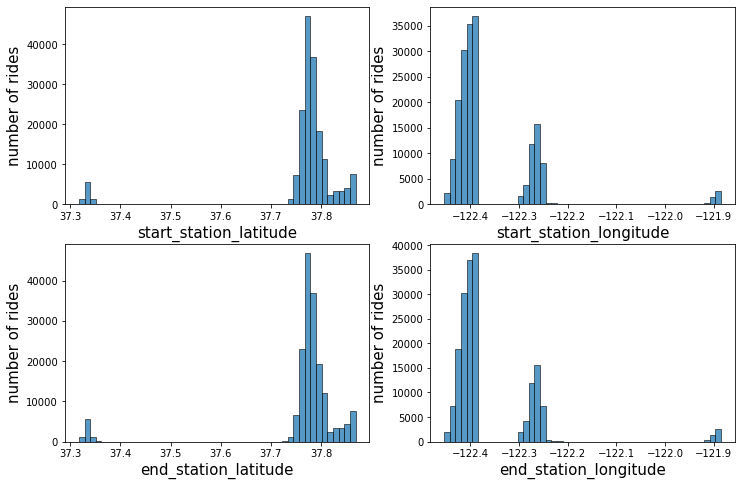

In [56]:
# set figure size
plt.figure(figsize=[12, 8])
# select subplot
plt.subplot(221)
# define the bins depending on min and max latitude/longitude and the desired number of subdivisions
subs = (df['start_station_latitude'].max() - df['start_station_latitude'].min())/50
bins = np.arange(df['start_station_latitude'].min(), df['start_station_latitude'].max(), subs)
# histogram plot
g = sb.histplot(data=df, x=df['start_station_latitude'],color=base_color, bins = bins);
chart("start_station_latitude", "number of rides", None , 0)

# same as above, this time for longitude
plt.subplot(222)
subs = (df['start_station_longitude'].max() - df['start_station_longitude'].min())/50
bins = np.arange(df['start_station_longitude'].min(), df['start_station_longitude'].max(), subs)
g = sb.histplot(data=df, x=df['start_station_longitude'],color=base_color, bins = bins);
chart("start_station_longitude", "number of rides", None , 0)

# same as the above plots but for ride ending station
#plt.figure(figsize=[12, 4])
plt.subplot(223)
subs = (df['end_station_latitude'].max() - df['end_station_latitude'].min())/50
bins = np.arange(df['end_station_latitude'].min(), df['end_station_latitude'].max(), subs)
g = sb.histplot(data=df, x=df['end_station_latitude'],color=base_color, bins = bins);
chart("end_station_latitude", "number of rides", None , 0)
plt.subplot(224)
subs = (df['end_station_longitude'].max() - df['end_station_longitude'].min())/50
bins = np.arange(df['end_station_longitude'].min(), df['end_station_longitude'].max(), subs)
g = sb.histplot(data=df, x=df['end_station_longitude'],color=base_color, bins = bins);
chart("end_station_longitude", "number of rides", None , 0)


### Observation 5
> Most of the rides are concentreated in a specific area (latitude 37.8, longitude -122,4) we will later try to draw this area in a map

### Question 6
> how are the rides distributed spatially, also depending on the day of the week?

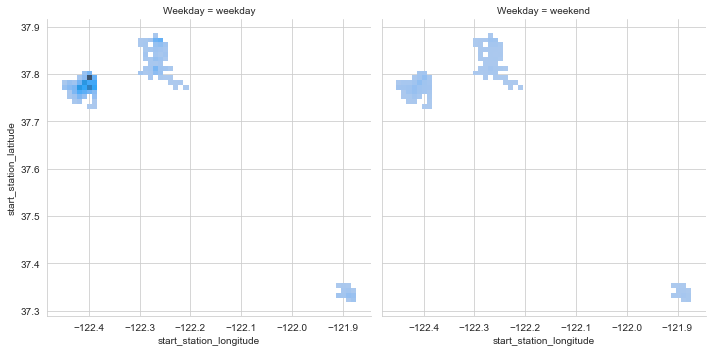

In [49]:
sb.set_style("whitegrid")
sb.displot(df, x = 'start_station_longitude', y = 'start_station_latitude',col = 'Weekday', binwidth=(.01, .01));

#### Observation 6
The traffic is mainly distributed in three areas of the SF bay, with main concentration around longitude -122.4 deg and latitude 37.8deg.
The spatial patterns are same between weekends and weekdays, only the volume of traffic changes.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In the first part of my analysis, I have mostly concentrated on the temporal and spatial features and how they are linked to the the traffic (number rides)
> It was interesting to notice that the service has a large number of stations (329) with large variation of the traffic. The most popular could have almost 4000 rides starting per month, the least less than a dozen.
> The number of rides varies largely depending on the time of the day on a weekday and has also less users during weekends, suggesting the service is mainly used for commuting.
> There are three main areas in which the service is used but most of the rides are concentrated in the North-West. Not being familiar with SF area, I will try to plot the rides on a map so to understand how are the stations spread geographically.

## Conclusions
> The Ford Go Bike sharing database contains information on the rides that have taken place in the SF Bay area in the month of Feb-2019. It is a well structured database with only small flaws that could be easily detected and fixed. <br>  <br>
In our investigation, we mainly concentrated on the features linked to the most number of rides, in particular time and space. <br>
We found, as expected, the traffic of rides is dependent on the particular station and area of the city. <br>
Obviously the traffic changes with time, especially following a weekly pattern. This was true apart for the day of Thu 13-Feb in which a storm hit the area. <br> <br>There are two main peaks of traffic during the day, related to the standard commuting hours. <br> <br>
The traffic is mainly distributed in three areas of the SF bay, with main concentration around longitude -122.4 deg and latitude 37.8deg.
The spatial patterns are same between weekends and weekdays, only the volume of traffic changes.